# Linear Regression Models

# Importing all the necessary libraries and uploading the dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail(1)

,age,sex,bmi,children,smoker,region,charges
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.shape

(1338, 7)

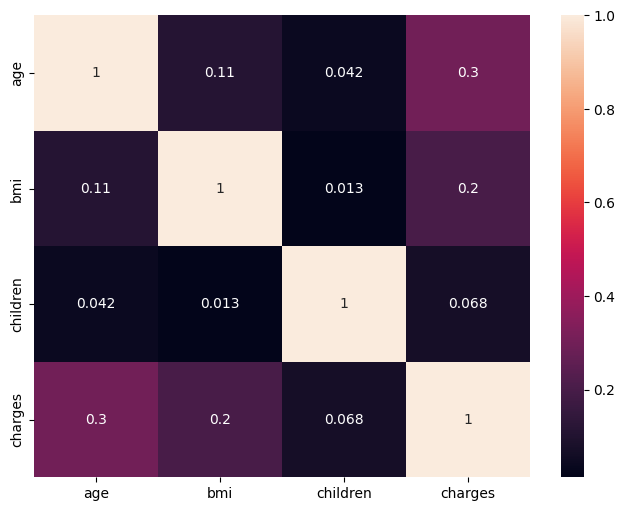

In [7]:
plt.figure(figsize = (8, 6))
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.show()

# Exploratory Data Analysis

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df[['sex', 'smoker', 'region']].value_counts()

sex     smoker  region   
female  no      southwest    141
                southeast    139
                northwest    135
male    no      southeast    134
                northwest    132
female  no      northeast    132
male    no      southwest    126
                northeast    125
        yes     southeast     55
                northeast     38
                southwest     37
female  yes     southeast     36
                northeast     29
                northwest     29
male    yes     northwest     29
female  yes     southwest     21
Name: count, dtype: int64

In [11]:
df.isnull().any()

,0
age,False
sex,False
bmi,False
children,False
smoker,False
region,False
charges,False


In [12]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


# Visual representation

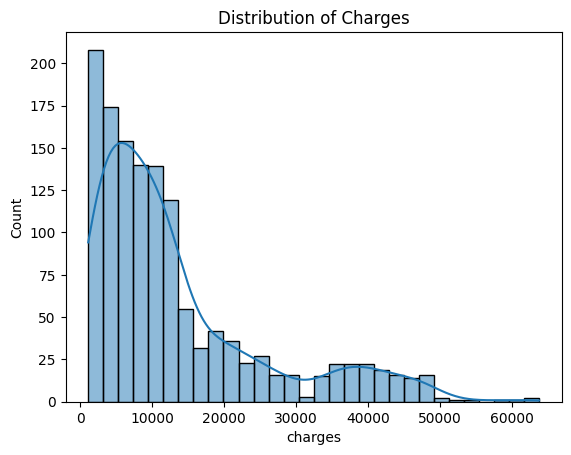

In [15]:
sns.histplot(x = 'charges', data = df, kde = True)
plt.title('Distribution of Charges')
plt.show()

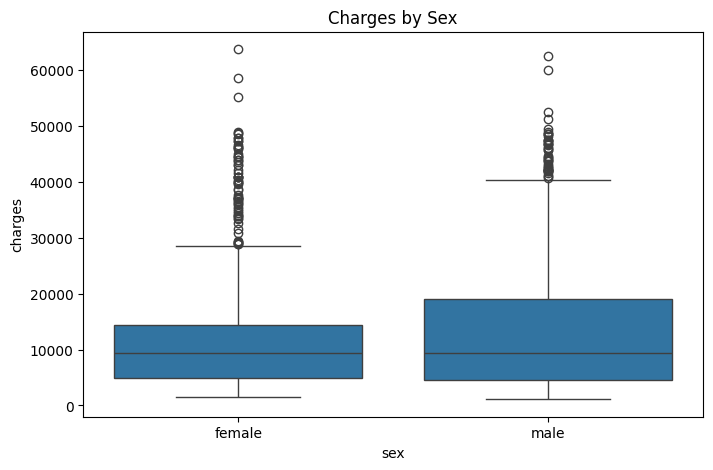

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges by Sex')
plt.show()

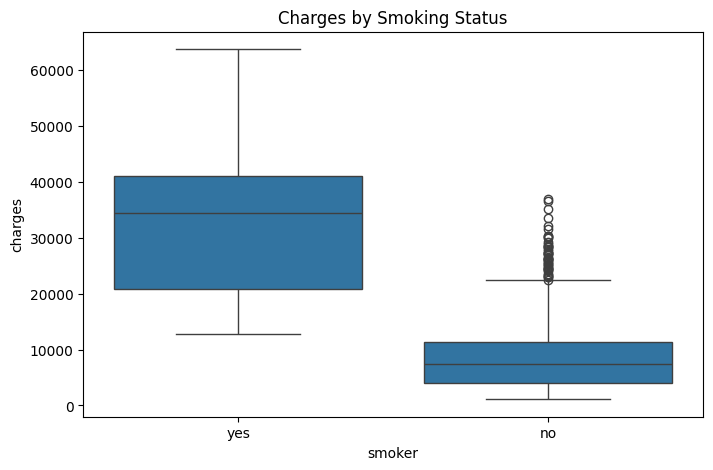

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoking Status')
plt.show()

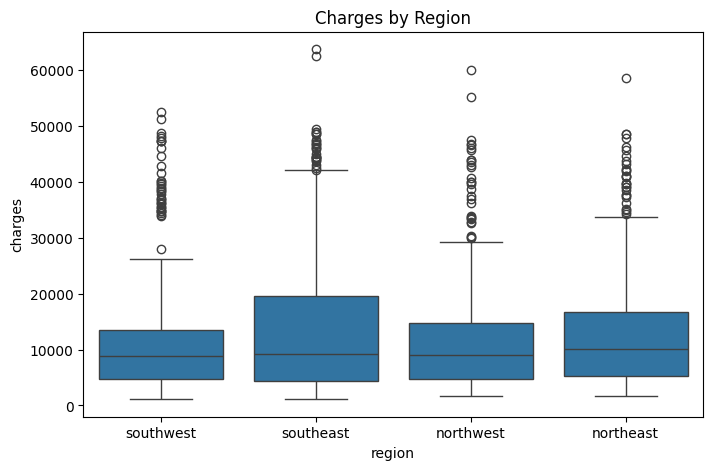

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')
plt.show()


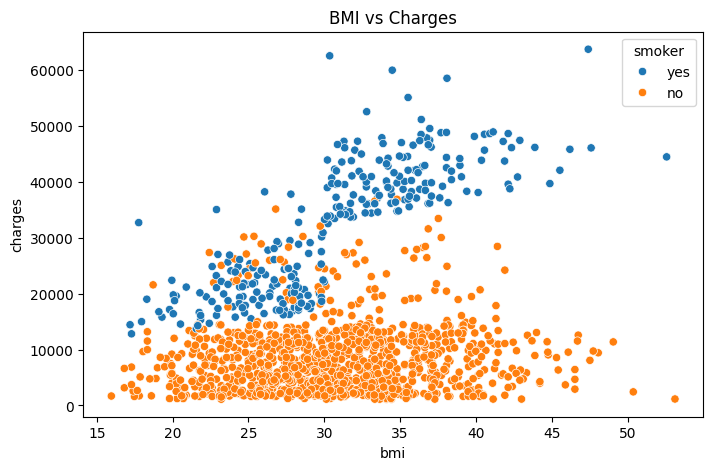

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker')
plt.title('BMI vs Charges')
plt.show()

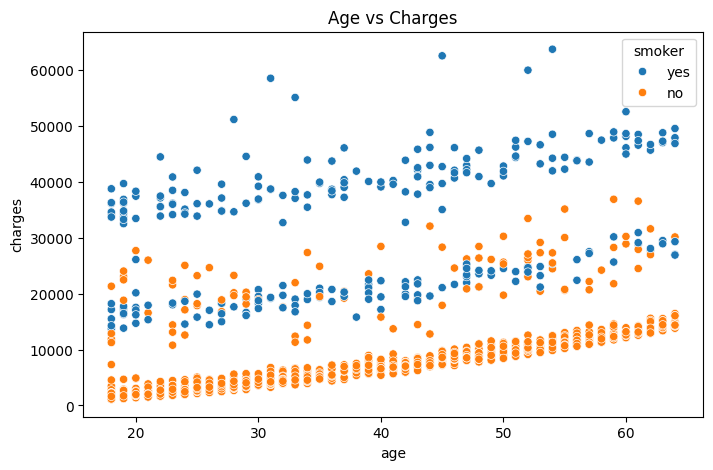

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='charges', data=df,hue='smoker')
plt.title('Age vs Charges')
plt.show()

# Encoding categorical data

In [21]:
le = LabelEncoder()
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].apply(le.fit_transform)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Checking for correlation

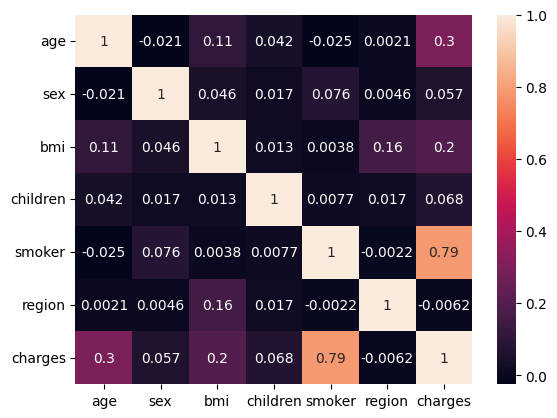

In [23]:
sns.heatmap(df.corr(), annot = True)
plt.show()

# Linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [28]:
x = df.drop('charges', axis=1)
y = df['charges']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [35]:
y_pred = lr.predict(x_test)

In [36]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2 Score:", r2)

MSE: 33635210.431178406
R2 Score: 0.7833463107364539


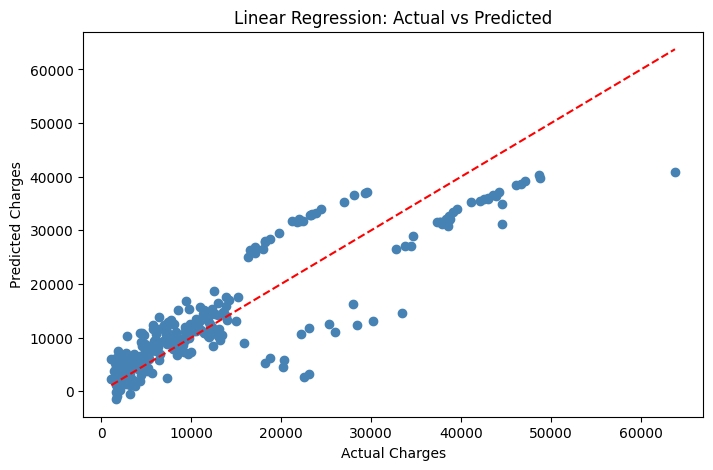

In [37]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

# Multi Linear Regression

In [38]:
x = df.drop('charges', axis=1)
y = df['charges']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [42]:
y_pred = mlr.predict(x_test)

In [43]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [44]:
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

Mean Squared Error (MSE): 33635210.431178406
R2 Score: 0.7833463107364539


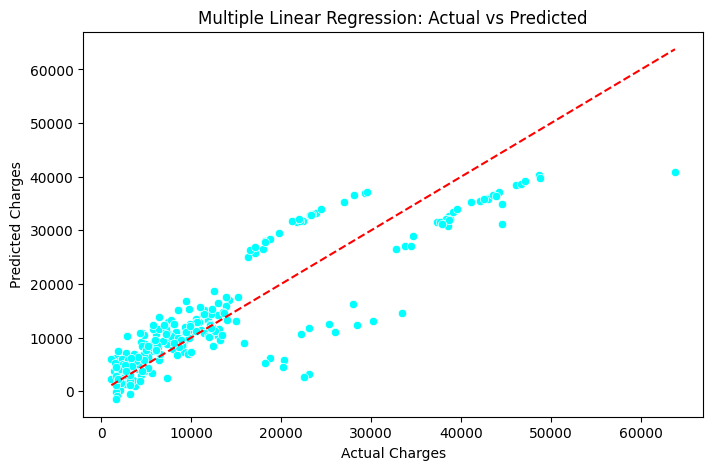

In [45]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color='cyan')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.show()


# Ridge Regression

In [48]:
from sklearn.linear_model import Ridge

In [49]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [50]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train_scaled, y_train)

Ridge()

In [51]:
y_pred_ridge = ridge.predict(x_test_scaled)

In [52]:
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)
print("MSE:", mse)
print("R2 Score:", r2)

MSE: 33641818.58882587
R2 Score: 0.7833037457661384


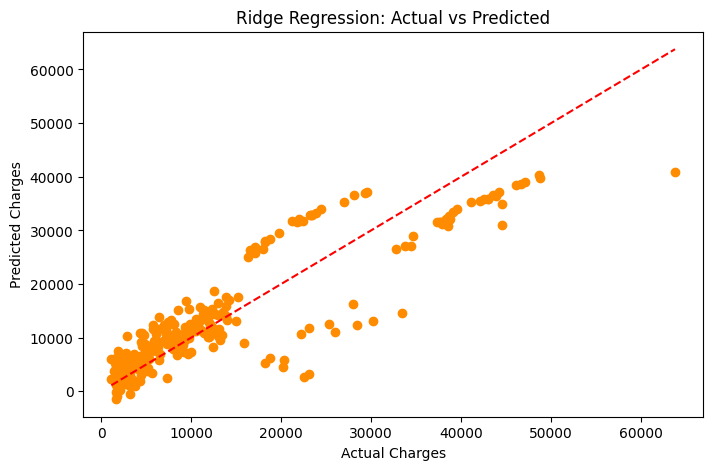

In [53]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_ridge, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Ridge Regression: Actual vs Predicted')
plt.show()


# Lasso Regression

In [55]:
from sklearn.linear_model import Lasso

In [56]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_scaled, y_train)

Lasso(alpha=0.1)

In [57]:
y_pred_lasso = lasso.predict(x_test_scaled)

In [58]:
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)
print("MSE:", mse)
print("R2 Score:", r2)

MSE: 33635473.22337668
R2 Score: 0.7833446180192526


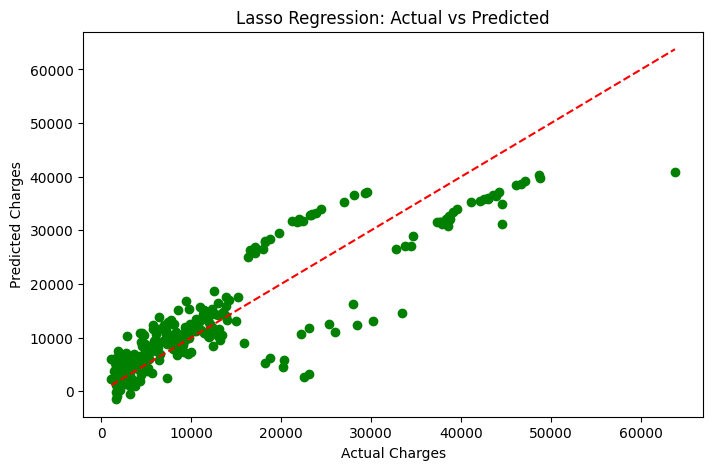

In [61]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lasso, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Lasso Regression: Actual vs Predicted')
plt.show()